In [1]:
#Used Cars Scraping Practice

#The example website to make sure this topic won't be too difficult
#https://medium.com/analytics-vidhya/scraping-car-prices-using-python-97086c30cd65


In [117]:
from bs4 import BeautifulSoup as bsoup
import requests
import pandas as pd
import re
import ast
import seaborn as sns
from matplotlib import pyplot as plt
import emoji

In [118]:
#Scraping from cars.com (all used cars in Lakewood,CO)
#url_1 = "https://www.cars.com/shopping/results/?stock_type=used&makes%5B%5D=&models%5B%5D=&list_price_max=&maximum_distance=30&zip=80225"

#100 Cars per page in Denver area (cars.com):
url_1 = "https://www.cars.com/shopping/results/?list_price_max=&makes[]=&maximum_distance=30&models[]=&page=1&page_size=100&stock_type=used&zip=80225"

In [119]:
response = requests.get(url_1)
print(response.status_code)
#response.status_code

200


In [120]:
html_soup = bsoup(response.text, 'html.parser')
#print(html_soup)

In [121]:
#Used to sift through and find the div, span, h, etc. tags and names associated with our variables
content_list = html_soup.find_all('div', attrs={'class': 'vehicle-card'})
print(content_list)

[<div class="vehicle-card inventory-result" data-listing-id="8573b5c7-4921-42b3-9ed0-02a1016ea06a" data-override-payload='{"sponsored_type":"premier","vertical_position":1}' data-tracking-id="1" data-tracking-type="srp-vehicle-card" id="vehicle-card-8573b5c7-4921-42b3-9ed0-02a1016ea06a-sponsored" phx-hook="VehicleCard" phx-target="6">
<a class="vehicle-card-visited-tracking-link" href="/vehicledetail/8573b5c7-4921-42b3-9ed0-02a1016ea06a/" rel="nofollow" tabindex="-1"></a>
<div class="vehicle-card-main js-gallery-click-card">
<div class="vehicle-card-photos js-gallery-click-gallery">
<cars-filmstrip totalcount="35">
<div class="gallery-wrap">
<div aria-label="Photo 1 of 35 of 2020 Nissan NV Cargo NV2500 HD SV V6/SV V8" class="image-wrap" data-index="0">
<img alt="Photo 1 of 35 of 2020 Nissan NV Cargo NV2500 HD SV V6/SV V8" class="vehicle-image" loading="lazy" src="https://platform.cstatic-images.com/large/in/v2/7aa60755-c731-5a41-a1f8-ddd21269eb53/fb0b01e9-d914-4235-8d24-b0c7b5b6a63b/eT

In [122]:
#Extract Name, Mileage, and price from Cars.com Data:

names = []
for item in content_list:
    #names.append(item.find_all('h2', attrs={'class': "title"}))
    names.append(item.find('h2').getText())
#print(names)

miles = []
for item in content_list:
    #miles.append(item.find_all('div', attrs={'class': "mileage"}))
    miles.append(item.find('div', attrs={'class': "mileage"}).getText())
#print(miles)

price = []
for item in content_list:
    #price.append(item.find_all('span', attrs={'class': "primary-price"}))
    price.append(item.find('span', attrs={'class': "primary-price"}).getText())
#print(price)


In [123]:
#Combine Name, Mileage, and Prices into Dataframe:
data = pd.DataFrame({"Name" : names, "Mileage" : miles, "Price" : price})[["Name", "Mileage", "Price"]]
data

,Name,Mileage,Price
0,2020 Nissan NV Cargo NV2500 HD SV V6/SV V8,"39,699 mi.","$39,387"
1,2019 Jeep Wrangler Unlimited Sport,"64,746 mi.","$34,980"
2,2020 Porsche Panamera E-Hybrid Sport Turismo 4,"11,220 mi.","$112,992"
3,2020 Jaguar E-PACE SE,"22,986 mi.","$41,637"
4,2016 Cadillac CT6 Premium Luxury AWD,"91,202 mi.","$27,598"
...,...,...,...
96,2008 Porsche 911 Carrera 4S Cabriolet,"56,988 mi.","$56,995"
97,2022 INFINITI QX50 Luxe,"9,478 mi.","$43,000"
98,2016 Audi A3 e-tron 1.4T Premium,"62,918 mi.","$25,995"
99,2020 Lincoln Continental Reserve,"19,245 mi.","$50,947"


In [124]:
#Convert Mileage to number:
def mileage(row):
    return int(row.split(" mi.")[0].replace(',',''))

data['Mileage'] = data['Mileage'].apply(mileage)

#data
#data.dtypes

In [125]:
#Convert Price to Number:
def price(row):
    return int(row.split("$")[1].replace(',', ''))

data['Price'] = data['Price'].apply(price)

#print(data)
#data.dtypes


In [126]:
#makes = open("Car_Manufacturers.txt").read()

data['Name'].str.extract(r''+test)
data['Make'] = data['Name'].str.extract(r''+makes_str)
#data.Name
#test
data.Make[pd.isnull(data['Make'])==True]

5     NaN
10    NaN
11    NaN
15    NaN
18    NaN
48    NaN
57    NaN
58    NaN
82    NaN
97    NaN
Name: Make, dtype: object

In [127]:
#Pull Year and Make out of Name:

#Import list of popular makes from online:
#makes = open("Car_Manufacturers.txt").read().split()
makes = open("Car_Manufacturers.txt").read()
#Pull out Makes from Name column:
#def make(row):
    #This could be improved (too much looping...)
    #for m in makes:
        #if m in row:
            #return m
    #return None 

#data['Make'] = data['Name'].apply(make)

makes_str = '(' + makes.replace('\n','|') + ')'
data['Make'] = data['Name'].str.extract(r''+makes_str)

#Pull out year from name column:
year_regex = re.compile('^\d.[0-9]*', re.DOTALL)

def year(row):
    if re.findall(year_regex, row)==[]:
        return None
    else:
        return re.findall(year_regex, row)[0]

data['Year'] = data['Name'].apply(year)

def Model(df):
    if pd.isnull(df['Make']) != True:
        #return df['Name'].replace({df['Name']:{df['Make']:'', df['Year']:''}}) <-cant get multiple replace to work
        one = df['Name'].replace(df['Make'], '')
        if df['Year'] != None:
            return one.replace(df['Year'], '')

data['Model'] = data.apply(Model, axis=1)


#Drop Name column:
data.drop('Name', axis=1, inplace=True)

data


,Mileage,Price,Make,Year,Model
0,39699,39387,Nissan,2020,NV Cargo NV2500 HD SV V6/SV V8
1,64746,34980,Jeep,2019,Wrangler Unlimited Sport
2,11220,112992,Porsche,2020,Panamera E-Hybrid Sport Turismo 4
3,22986,41637,Jaguar,2020,E-PACE SE
4,91202,27598,Cadillac,2016,CT6 Premium Luxury AWD
...,...,...,...,...,...
96,56988,56995,Porsche,2008,911 Carrera 4S Cabriolet
97,9478,43000,NaN,2022,None
98,62918,25995,Audi,2016,A3 e-tron 1.4T Premium
99,19245,50947,Lincoln,2020,Continental Reserve


/mnt/c/Users/Ainsley/Desktop/Tools1/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

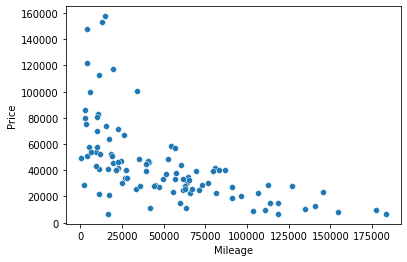

In [128]:
#Plot Mileage v. Price:
sns.scatterplot(data['Mileage'], data['Price'])

/mnt/c/Users/Ainsley/Desktop/Tools1/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


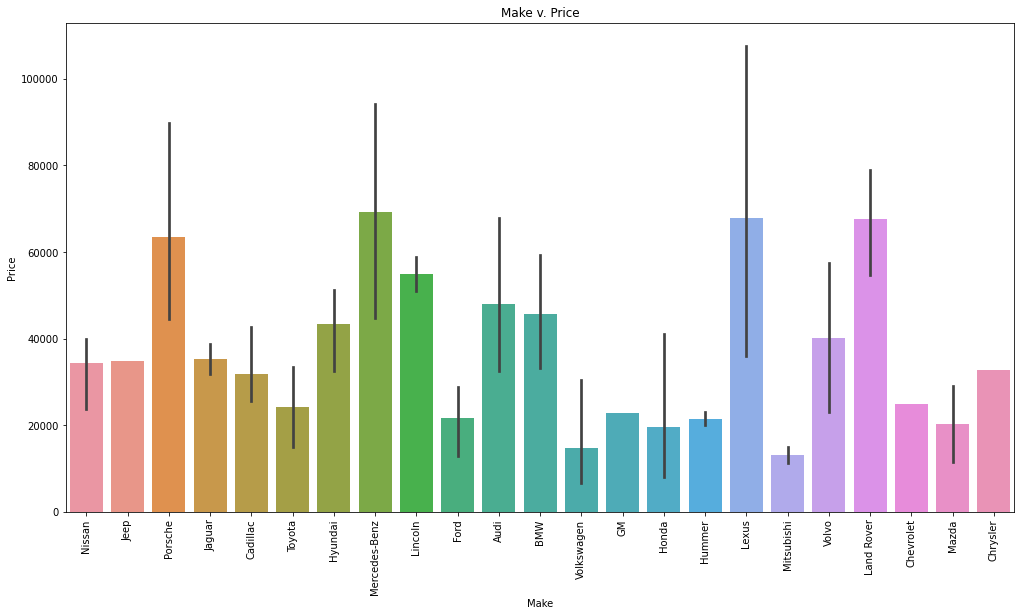

In [129]:

fig, ax = plt.subplots(figsize=(17,9 ))
sns.barplot(data['Make'], data['Price'], ax=ax)
ax.set_title('Make v. Price')
ax.set_xlabel('Make')
ax.set_ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [130]:
#re.findall(year_regex, data['Name'][0])
#data['Name'][0]

#re.findall(year_regex, '2012 Chevrolet Suburban 1500 LTZ')
#data['Make'].unique()

KeyError: 'Name'

In [131]:
#Generate a Rating Function:

#Compute average price for each make:
#avg_make_price = movie.movie_title.str.len().groupby([movie.years, movie.Action]).mean()
avg_make_price = data.Price.groupby(data.Make).mean()
avg_make_price_dict = avg_make_price.to_dict()
#print(avg_make_price)
#avg_make_price['Ford']

#Function for computing comparative rating:
#def rating(df):
    #for m in makes:
        #if df['Make'] == m:
            #return df['Price']/avg_make_price[m]/(df['Mileage']/10000)*(int(df['Year'])/1000)
    #return df['Price']/avg_make_price[]

#data['Rating'] = data.apply(rating, axis=1)    
data['Rating'] = data['Price']/data['Make'].map(avg_make_price_dict)/(data['Mileage']/10000)*(data['Year'].astype(int)/1000)
data

#data['Price'][0]/avg_make_price['Chevrolet']*(data['Mileage'][0]/100000)*(int(data['Year'][0])/1000)

,Mileage,Price,Make,Year,Model,Rating
0,39699,39387,Nissan,2020,NV Cargo NV2500 HD SV V6/SV V8,0.582685
1,64746,34980,Jeep,2019,Wrangler Unlimited Sport,0.311834
2,11220,112992,Porsche,2020,Panamera E-Hybrid Sport Turismo 4,3.201319
3,22986,41637,Jaguar,2020,E-PACE SE,1.037006
4,91202,27598,Cadillac,2016,CT6 Premium Luxury AWD,0.191572
...,...,...,...,...,...,...
96,56988,56995,Porsche,2008,911 Carrera 4S Cabriolet,0.316038
97,9478,43000,NaN,2022,None,NaN
98,62918,25995,Audi,2016,A3 e-tron 1.4T Premium,0.173489
99,19245,50947,Lincoln,2020,Continental Reserve,0.973594


In [132]:

bin_title = [emoji.emojize(':star:'),emoji.emojize(':star::star:'),emoji.emojize(':star::star::star:'),
             emoji.emojize(':star::star::star::star:'),emoji.emojize(':star::star::star::star::star:')]

data['Star_Rating'] = pd.qcut(data['Rating'],q=5,labels=bin_title)
data

,Mileage,Price,Make,Year,Model,Rating,Star_Rating
0,39699,39387,Nissan,2020,NV Cargo NV2500 HD SV V6/SV V8,0.582685,⭐⭐⭐
1,64746,34980,Jeep,2019,Wrangler Unlimited Sport,0.311834,⭐⭐⭐
2,11220,112992,Porsche,2020,Panamera E-Hybrid Sport Turismo 4,3.201319,⭐⭐⭐⭐⭐
3,22986,41637,Jaguar,2020,E-PACE SE,1.037006,⭐⭐⭐⭐
4,91202,27598,Cadillac,2016,CT6 Premium Luxury AWD,0.191572,⭐⭐
...,...,...,...,...,...,...,...
96,56988,56995,Porsche,2008,911 Carrera 4S Cabriolet,0.316038,⭐⭐⭐
97,9478,43000,NaN,2022,None,NaN,NaN
98,62918,25995,Audi,2016,A3 e-tron 1.4T Premium,0.173489,⭐
99,19245,50947,Lincoln,2020,Continental Reserve,0.973594,⭐⭐⭐⭐
